<a href="https://colab.research.google.com/github/mostafizur1997/Deep-Learning/blob/main/ANN_practical_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
#importing libraries
dataset= pd.read_csv('/content/Churn_Modelling.csv')


In [4]:
# display the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
#Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13] #independent
y = dataset.iloc[:,13]  #dependent

In [6]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [7]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [8]:
#Feature engineering
#Creating dummy variables
geography = pd.get_dummies(X["Geography"], drop_first=True)
gender = pd.get_dummies(X['Gender'], drop_first= True)

In [9]:
geography.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [10]:
gender.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [11]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [12]:
#concanate these varibale with dataframes
X= X.drop(['Geography', 'Gender'], axis=1)

In [13]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [14]:
X = pd.concat([X, geography, gender], axis=1) # Note: axis= 0 computes the sum of values for each column (along rows)., axis =1 indicates computes the mean of values for each row (along columns).

In [15]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [16]:
#spiling the dataset into trainig and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size =0.2, random_state=0)

In [17]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [18]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [19]:
X_test

array([[-0.56129438, -0.39401698,  0.9869706 , ...,  1.62776996,
        -0.57427105, -1.11339196],
       [-1.33847768,  0.07611425, -1.08432132, ..., -0.61433742,
        -0.57427105, -1.11339196],
       [ 0.58347561,  0.26416674,  0.9869706 , ..., -0.61433742,
         1.74133801, -1.11339196],
       ...,
       [-0.76084144, -0.29999074, -1.42953664, ..., -0.61433742,
         1.74133801,  0.8981563 ],
       [-0.0046631 , -0.48804323, -0.39389068, ...,  1.62776996,
        -0.57427105,  0.8981563 ],
       [-0.81335383, -0.86414821,  0.9869706 , ...,  1.62776996,
        -0.57427105,  0.8981563 ]])

In [20]:
X_train.shape

(8000, 11)

In [21]:
X_test.shape

(2000, 11)

#Part2 to discuss about ANN

In [22]:

# keras is works as a wrapper tensorflow 2.0 >, simply work to call a function
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [23]:
# let's intialize the ANN
classifier = Sequential()

In [24]:
# Adding the input layer
classifier.add(Dense(units =11, activation ='relu'))



In [25]:
#adding the first hidden layer
classifier.add(Dense(units=7, activation = 'relu'))
classifier.add(Dropout(0.2))

In [26]:
#adding the second hidden layer
classifier.add(Dense(units= 6, activation = 'relu'))
classifier.add(Dropout(0.3))

In [27]:
### adding the output layer
classifier.add(Dense(1, activation= 'sigmoid'))

In [28]:
#classifier.compile(optimizer ='adam', loss ='binary_crossentropy', metrics=['accuracy'])

In [33]:
classifier.compile(optimizer =opt, loss ='binary_crossentropy', metrics=['accuracy'])

In [34]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate= 0.01)

In [35]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [36]:
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size =10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 3s 4ms/step - loss: 0.4801 - accuracy: 0.7964 - val_loss: 0.4052 - val_accuracy: 0.8330
Epoch 2/1000
536/536 [==============================] - 2s 5ms/step - loss: 0.4158 - accuracy: 0.8259 - val_loss: 0.3997 - val_accuracy: 0.8239
Epoch 3/1000
536/536 [==============================] - 3s 5ms/step - loss: 0.3921 - accuracy: 0.8377 - val_loss: 0.3833 - val_accuracy: 0.8429
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3915 - accuracy: 0.8406 - val_loss: 0.3763 - val_accuracy: 0.8444
Epoch 5/1000
536/536 [==============================] - 1s 2ms/step - loss: 0.3878 - accuracy: 0.8421 - val_loss: 0.3759 - val_accuracy: 0.8466
Epoch 6/1000
536/536 [==============================] - 2s 3ms/step - loss: 0.3774 - accuracy: 0.8475 - val_loss: 0.3769 - val_accuracy: 0.8451
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3830 - accuracy: 0.8403 - val_loss: 0.3869 - val_accuracy:

In [37]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

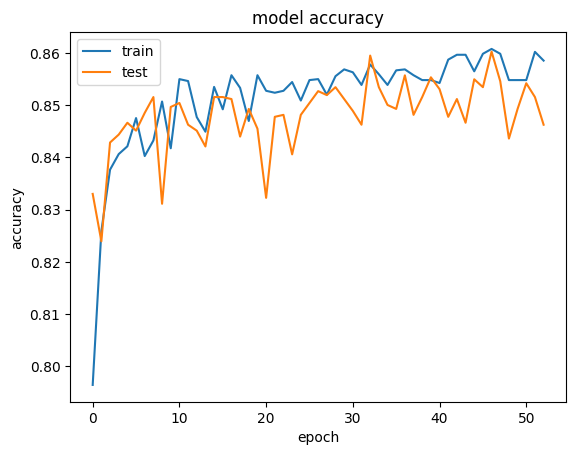

In [38]:
# summarize the history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc= 'upper left')
plt.show()

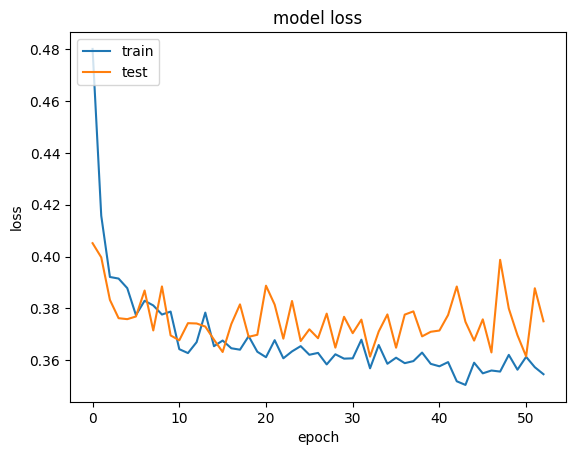

In [39]:
#summarize the history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc= 'upper left')
plt.show()

# Part 3 - Making the predictions and evaluting the model

In [40]:


# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 [==============================] - 0s 2ms/step


In [41]:
### make the confusion matrics
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[1561,   34],
       [ 263,  142]])

In [42]:
#calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)

In [43]:
score

0.8515

In [44]:
#get the weights
classifier.get_weights()

[array([[ 0.10484895, -0.14895533, -0.3220711 , -0.29820773,  1.0342158 ,
         -0.21361548, -0.5403331 , -1.2322687 ,  0.04940957, -0.18399277,
          0.17874248],
        [-3.550242  ,  1.0051867 , -1.5363097 ,  2.786086  , -2.8833356 ,
         -1.2078698 ,  2.2531722 , -0.17786144, -0.5895366 ,  1.0485723 ,
         -4.0537343 ],
        [-0.5535711 , -0.06206721,  0.36057526, -0.15809892,  1.0844669 ,
          1.1219227 ,  0.04073013, -0.03004571,  0.8225881 ,  0.5006259 ,
          0.43936405],
        [ 0.5962085 ,  1.2429352 , -1.2950023 , -0.84237736, -0.6298123 ,
         -0.6192348 , -0.64945406,  0.13173464, -3.8664918 , -1.8245077 ,
         -0.48844972],
        [ 0.21674228,  3.8168213 , -0.38704032,  0.3555238 , -1.6535897 ,
          0.9013259 , -0.6643938 , -2.133083  , -0.68493176, -4.5102825 ,
         -0.37218875],
        [-0.83943444, -0.10970762,  0.602461  ,  0.2829039 ,  2.7650368 ,
          0.6637615 , -0.32249767, -0.08292466, -0.2126842 , -0.2753068